# Разведывательный анализ данных (EDA)
### Итак, вспомним основные цели EDA:

* Сформулировать предположения и гипотезы для дальнейшего построения модели.
* Проверить качество данных и очистить их, если это необходимо.
* Определиться с параметрами модели.
* Последовательность проведения анализа зависит от задачи. EDA — это своего рода искусство!

## Начнем с азов: импортируем нужные для чтения и первичного анализа библиотеки и прочитаем файл:

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
%matplotlib inline
%pylab inline

pd.set_option('display.max_rows', 50) # show more lines 
pd.set_option('display.max_columns', 50) # show more columns

Populating the interactive namespace from numpy and matplotlib


In [30]:
students = pd.read_csv('../data/stud_math.csv')
display(students.head(10))


school sex  age address famsize Pstatus  Medu  Fedu      Mjob     Fjob  \
0     GP   F   18       U     NaN       A   4.0   4.0   at_home  teacher   
1     GP   F   17       U     GT3     NaN   1.0   1.0   at_home    other   
2     GP   F   15       U     LE3       T   1.0   1.0   at_home    other   
3     GP   F   15       U     GT3       T   4.0   2.0    health      NaN   
4     GP   F   16       U     GT3       T   3.0   3.0     other    other   
5     GP   M   16       U     LE3       T   4.0   3.0  services    other   
6     GP   M   16     NaN     LE3       T   2.0   2.0     other    other   
7     GP   F   17       U     GT3       A   4.0   4.0     other  teacher   
8     GP   M   15       U     LE3       A   3.0   2.0  services    other   
9     GP   M   15       U     NaN     NaN   3.0   4.0     other    other   

       reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0      course   mother         2.0        2.0       0.0       yes     no   no   
1      course   father         1.0        2.0       0.0        no    yes   no   
2       other   mother         1.0        2.0       3.0       yes     no  NaN   
3        home   mother         1.0        3.0       0.0        no    yes  yes   
4        home   father         1.0        2.0       0.0        no    yes  yes   
5  reputation   mother         1.0        2.0       0.0        no    yes  yes   
6        home   mother         1.0        2.0       0.0        no     no   no   
7        home   mother         2.0        2.0       0.0       yes    yes   no   
8        home   mother         1.0        2.0       0.0        no    yes  yes   
9        home   mother         1.0        2.0       0.0        no    yes  yes   

  activities nursery  studytime, granular higher internet romantic  famrel  \
0         no     yes                 -6.0    yes      NaN       no     4.0   
1         no      no                 -6.0    yes      yes       no     5.0   
2         no     yes                 -6.0    yes      yes      NaN     4.0   
3        yes     yes                 -9.0    yes      yes      yes     3.0   
4         no     yes                 -6.0    yes       no       no     4.0   
5        yes     yes                 -6.0    yes      yes       no     5.0   
6         no     yes                 -6.0    yes      yes       no     4.0   
7         no     yes                 -6.0    yes       no       no     4.0   
8         no     yes                 -6.0    yes      yes       no     NaN   
9        yes     yes                 -6.0    yes      yes       no     5.0   

   freetime  goout  health  absences  score  
0       3.0    4.0     3.0       6.0   30.0  
1       3.0    3.0     3.0       4.0   30.0  
2       3.0    2.0     3.0      10.0   50.0  
3       2.0    2.0     5.0       2.0   75.0  
4       3.0    2.0     5.0       4.0   50.0  
5       4.0    2.0     5.0      10.0   75.0  
6       4.0    4.0     3.0       0.0   55.0  
7       1.0    4.0     1.0       6.0   30.0  
8       2.0    2.0     1.0       0.0   95.0  
9       5.0    1.0     5.0       0.0   75.0

In [31]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [32]:
# Functions for EDA

#First put headers and descriptions into dictionary to plot with corresponding titles 
# START
descr = '''school — аббревиатура школы, в которой учится ученик\n
sex — пол ученика ('F' - женский, 'M' - мужской)\n
age — возраст ученика (от 15 до 22)\n
address — тип адреса ученика ('U' - городской, 'R' - за городом)\n
famsize — размер семьи('LE3' <= 3, 'GT3' >3)\n
Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)\n
Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)\n
Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)\n
Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)\n
Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)\n
reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)\n
guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)\n
traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)\n
studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)\n
failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)\n
schoolsup — дополнительная образовательная поддержка (yes или no)\n
famsup — семейная образовательная поддержка (yes или no)\n
paid — дополнительные платные занятия по математике (yes или no)\n
activities — дополнительные внеучебные занятия (yes или no)\n
nursery — посещал детский сад (yes или no)\n
higher — хочет получить высшее образование (yes или no)\n
internet — наличие интернета дома (yes или no)\n
romantic — в романтических отношениях (yes или no)\n
famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)\n
freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)\n
goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)\n
health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)\n
absences — количество пропущенных занятий\n
score — баллы по госэкзамену по математике\n
granular — категориальный признак для studytime '''

dict_titles = {}
for row in descr.split('\n'):
    row = row.split(' — ')
    if len(row) > 1:
        header = row[0]
        title = row[1]
        dict_titles[header] = title
#FINISH


# Create func to plot features
def display_plot(column:str, data:pd.DataFrame = students, plot_type:str = "bar"):
    '''Display plot of column 

    Args:
     1. column : string
     2. data = students - default : DataFrame
     3. plot_type = "bar","boxplot","distplot" : string

    '''
    if plot_type == 'bar':
        graphic = data[column].value_counts().reset_index()
        graphic.plot(x = 'index',
                y = column,
                kind = 'bar',
                grid = True, 
                title =  dict_titles[column].capitalize())

    elif plot_type == 'boxplot':
        fig, ax = plt.subplots(figsize = (14, 4))
        sns.boxplot(x=column, y='score',
                    data=data.loc[data.loc[:, column].isin(data.loc[:, column].value_counts().index[:10])],
                    ax=ax)
        plt.xticks(rotation=45)
        ax.set_title('Boxplot for ' + column +  ' \n '+ dict_titles[column].capitalize())
        plt.show()

    elif plot_type == 'distplot':
        sns.set()
        fig, ax = plt.subplots(figsize=[12, 4])
        sns.distplot(data[column], bins=10, label=dict_titles[column].capitalize())
        ax.legend(loc=1)
        plt.show()
    
    elif plot_type == 'heatmap':
        correlation = data[column].corr()
        fig, ax = plt.subplots(figsize=[12, 4])
        sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=.5, ax=ax)
        plt.show()
        


def get_stat_dif(column:str, data:pd.DataFrame = students, target:str='score', alpha : float = 0.05):
    cols = data.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], target], 
                        data.loc[data.loc[:, column] == comb[1], target]).pvalue \
            <= alpha/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки:', column)

def iqr_test(column:str, data:pd.DataFrame=students):
    '''Calculate quantiles(0.25,0.75),IQR - (interquartile range)

        Formula:
        
        { q1 - 1.5*IQR },{ q3 + 1.5*IQR }

        Args:
        1. data = (default) students : DataFrame
        2. column : string
        
        Returns:
            list[quantile1, quantile3, iqr]
    '''
    q1 = data[column].quantile(q=0.25)
    q3 = data[column].quantile(q=0.75)

    # InterQuartile Range
    IQR = q3 - q1
    print('=========')
    print(f'Для колонки: {column}')
    print(f'25-% квартиль: {q1}')
    print(f'75-% квартиль: {q3}')
    print(f'IQR: {IQR}')
    print(f'Границы разборса: ({ q1 - 1.5*IQR },{ q3 + 1.5*IQR })')
    return [q1, q3, IQR]


# Описание датасета
## Посмотрим на переменные, которые содержит датасет:

1. school — аббревиатура школы, в которой учится ученик

2. sex — пол ученика ('F' - женский, 'M' - мужской)

3. age — возраст ученика (от 15 до 22)

4. address — тип адреса ученика ('U' - городской, 'R' - за городом)

5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16. schoolsup — дополнительная образовательная поддержка (yes или no)

17. famsup — семейная образовательная поддержка (yes или no)

18. paid — дополнительные платные занятия по математике (yes или no)

19. activities — дополнительные внеучебные занятия (yes или no)

20. nursery — посещал детский сад (yes или no)

21. higher — хочет получить высшее образование (yes или no)

22. internet — наличие интернета дома (yes или no)

23. romantic — в романтических отношениях (yes или no)

24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28. absences — количество пропущенных занятий

29. score — баллы по госэкзамену по математике


### Рассмотрим, какие данные хранятся в файле:

In [33]:
print("Columns count: ",len(students.columns))

Columns count:  30


### Несовпадение с описанием
#### в Описании говорится о 29 колонках, но можно заметить, что в по существу колонок 30, лишней является 'studytime, granular' - заменим ее на granular - без описания

In [34]:
# Rename columns
students.columns = ['school', 'sex', 'age',
                'address', 'famsize', 'Pstatus',
                'Medu', 'Fedu', 'Mjob',
                'Fjob', 'reason', 'guardian',
                'traveltime', 'studytime', 'failures',
                'schoolsup', 'famsup', 'paid',
                'activities', 'nursery', 'granular',
                'higher', 'internet', 'romantic',
                'famrel', 'freetime', 'goout',
                'health', 'absences', 'score']


In [35]:
# describe numeric columns
students.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  392.000000  371.000000  367.000000  388.000000  373.000000   
mean    16.696203    2.750000    2.614555    1.438692    2.038660    0.337802   
std      1.276043    1.098127    2.228732    0.694181    0.842078    0.743135   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000   40.000000    4.000000    4.000000    3.000000   

         granular      famrel    freetime       goout      health    absences  \
count  388.000000  368.000000  384.000000  387.000000  380.000000  383.000000   
mean    -6.115979    3.937500    3.231771    3.105943    3.531579    7.279373   
std      2.526235    0.927277    0.993940    1.115896    1.396019   23.465197   
min    -12.000000   -1.000000    1.000000    1.000000    1.000000    0.000000   
25%     -6.000000    4.000000    3.000000    2.000000    3.000000    0.000000   
50%     -6.000000    4.000000    3.000000    3.000000    4.000000    4.000000   
75%     -3.000000    5.000000    4.000000    4.000000    5.000000    8.000000   
max     -3.000000    5.000000    5.000000    5.000000    5.000000  385.000000   

            score  
count  389.000000  
mean    52.262211  
std     22.919022  
min      0.000000  
25%     40.000000  
50%     55.000000  
75%     70.000000  
max    100.000000

In [36]:
# desribe columns with string values
students.describe(include=['O'])

school  sex address famsize Pstatus   Mjob   Fjob  reason guardian  \
count     395  395     378     368     350    376    359     378      364   
unique      2    2       2       2       2      5      5       4        3   
top        GP    F       U     GT3       T  other  other  course   mother   
freq      349  208     295     261     314    133    197     137      250   

       schoolsup famsup paid activities nursery higher internet romantic  
count        386    356  355        381     379    375      361      364  
unique         2      2    2          2       2      2        2        2  
top           no    yes   no        yes     yes    yes      yes       no  
freq         335    219  200        195     300    356      305      240

In [37]:
students.describe(include='all').T

count unique     top freq      mean       std  min  25%  50%  75%  \
school       395      2      GP  349       NaN       NaN  NaN  NaN  NaN  NaN   
sex          395      2       F  208       NaN       NaN  NaN  NaN  NaN  NaN   
age          395    NaN     NaN  NaN   16.6962   1.27604   15   16   17   18   
address      378      2       U  295       NaN       NaN  NaN  NaN  NaN  NaN   
famsize      368      2     GT3  261       NaN       NaN  NaN  NaN  NaN  NaN   
Pstatus      350      2       T  314       NaN       NaN  NaN  NaN  NaN  NaN   
Medu         392    NaN     NaN  NaN      2.75   1.09813    0    2    3    4   
Fedu         371    NaN     NaN  NaN   2.61456   2.22873    0    2    2    3   
Mjob         376      5   other  133       NaN       NaN  NaN  NaN  NaN  NaN   
Fjob         359      5   other  197       NaN       NaN  NaN  NaN  NaN  NaN   
reason       378      4  course  137       NaN       NaN  NaN  NaN  NaN  NaN   
guardian     364      3  mother  250       NaN       NaN  NaN  NaN  NaN  NaN   
traveltime   367    NaN     NaN  NaN   1.43869  0.694181    1    1    1    2   
studytime    388    NaN     NaN  NaN   2.03866  0.842078    1    1    2    2   
failures     373    NaN     NaN  NaN  0.337802  0.743135    0    0    0    0   
schoolsup    386      2      no  335       NaN       NaN  NaN  NaN  NaN  NaN   
famsup       356      2     yes  219       NaN       NaN  NaN  NaN  NaN  NaN   
paid         355      2      no  200       NaN       NaN  NaN  NaN  NaN  NaN   
activities   381      2     yes  195       NaN       NaN  NaN  NaN  NaN  NaN   
nursery      379      2     yes  300       NaN       NaN  NaN  NaN  NaN  NaN   
granular     388    NaN     NaN  NaN  -6.11598   2.52623  -12   -6   -6   -3   
higher       375      2     yes  356       NaN       NaN  NaN  NaN  NaN  NaN   
internet     361      2     yes  305       NaN       NaN  NaN  NaN  NaN  NaN   
romantic     364      2      no  240       NaN       NaN  NaN  NaN  NaN  NaN   
famrel       368    NaN     NaN  NaN    3.9375  0.927277   -1    4    4    5   
freetime     384    NaN     NaN  NaN   3.23177   0.99394    1    3    3    4   
goout        387    NaN     NaN  NaN   3.10594    1.1159    1    2    3    4   
health       380    NaN     NaN  NaN   3.53158   1.39602    1    3    4    5   
absences     383    NaN     NaN  NaN   7.27937   23.4652    0    0    4    8   
score        389    NaN     NaN  NaN   52.2622    22.919    0   40   55   70   

            max  
school      NaN  
sex         NaN  
age          22  
address     NaN  
famsize     NaN  
Pstatus     NaN  
Medu          4  
Fedu         40  
Mjob        NaN  
Fjob        NaN  
reason      NaN  
guardian    NaN  
traveltime    4  
studytime     4  
failures      3  
schoolsup   NaN  
famsup      NaN  
paid        NaN  
activities  NaN  
nursery     NaN  
granular     -3  
higher      NaN  
internet    NaN  
romantic    NaN  
famrel        5  
freetime      5  
goout         5  
health        5  
absences    385  
score       100

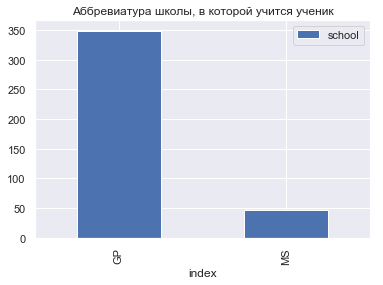

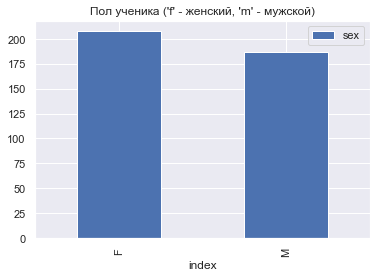

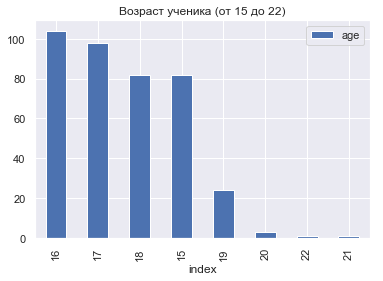

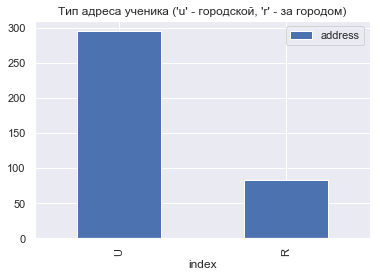

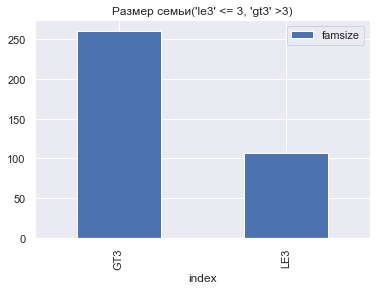

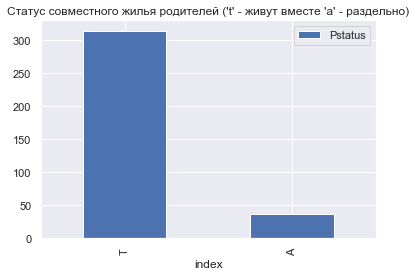

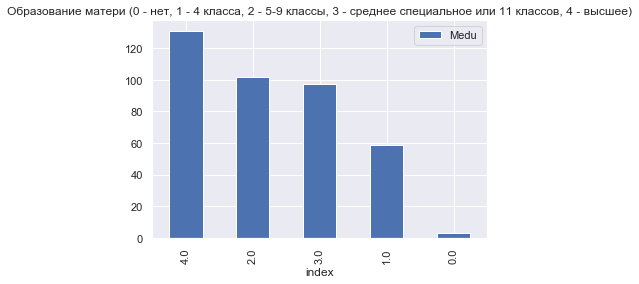

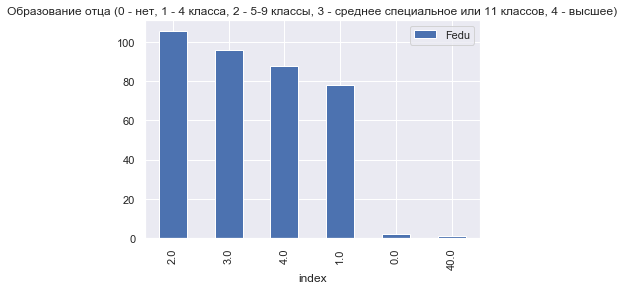

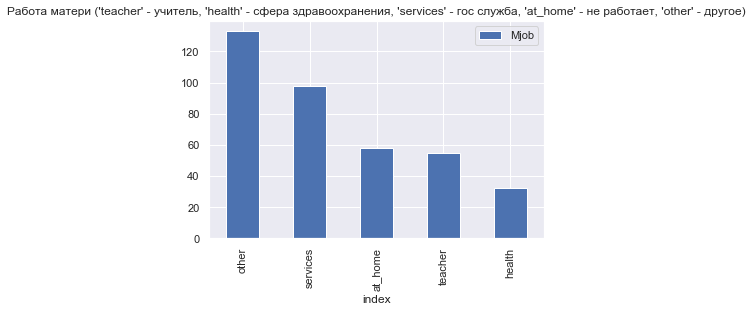

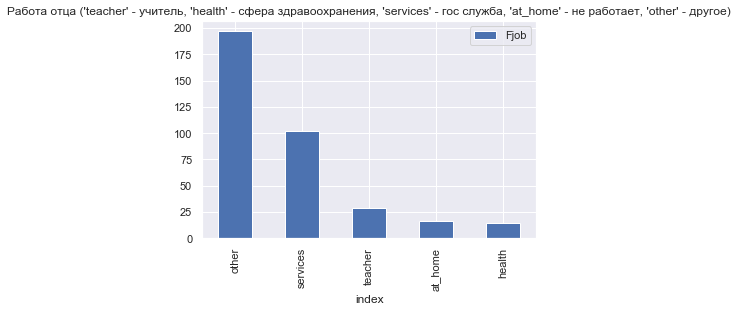

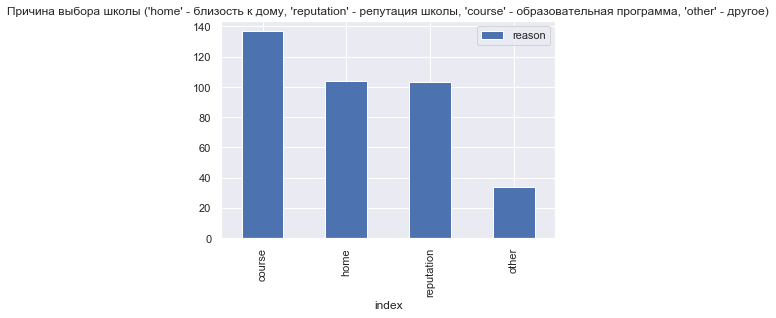

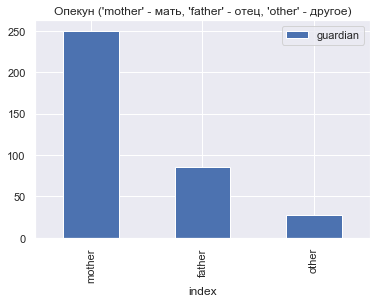

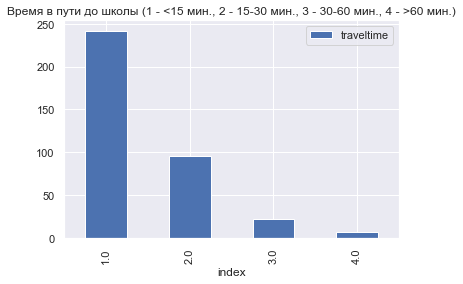

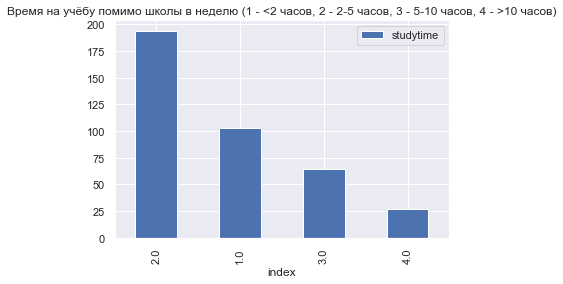

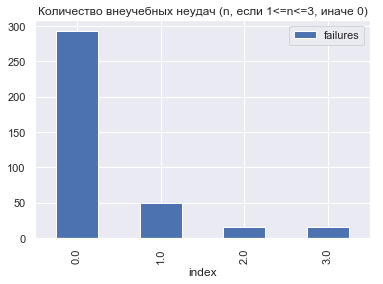

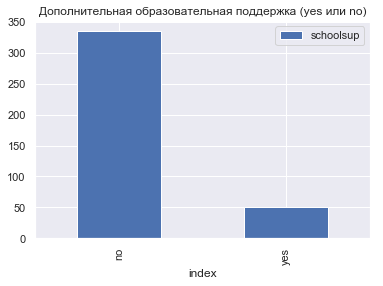

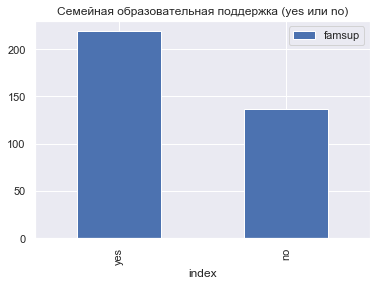

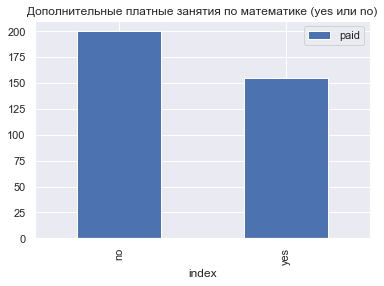

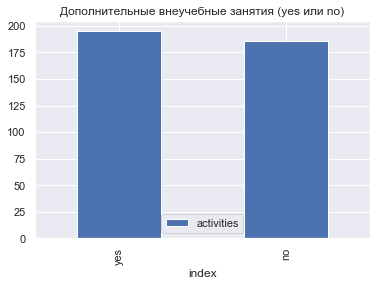

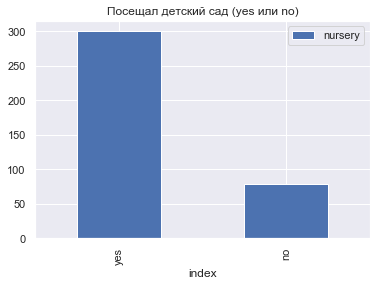

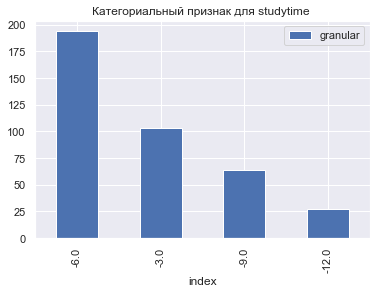

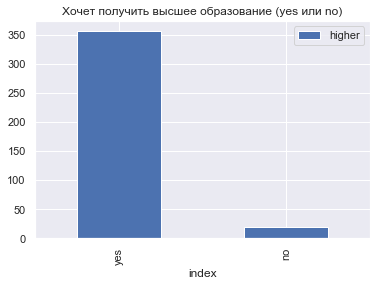

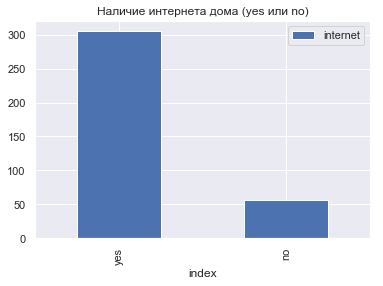

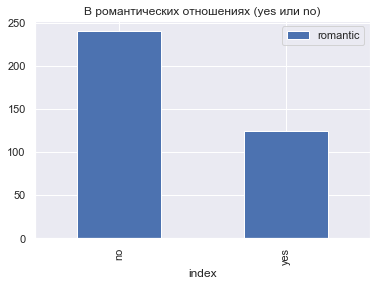

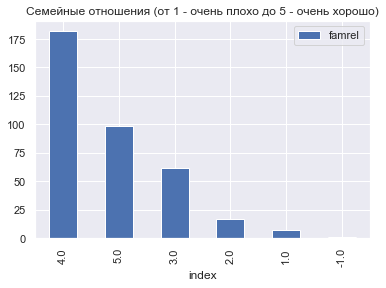

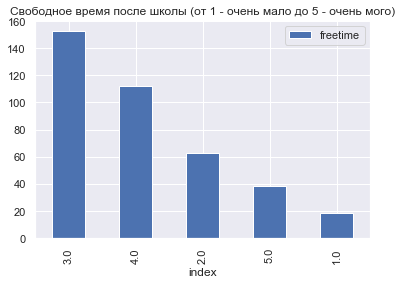

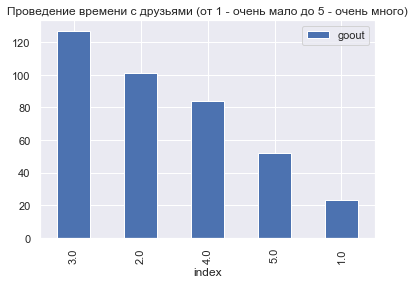

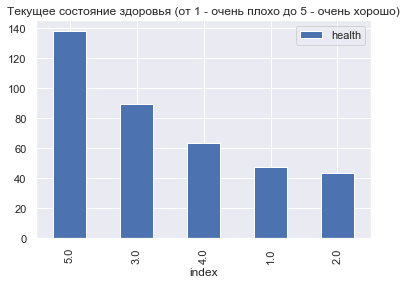

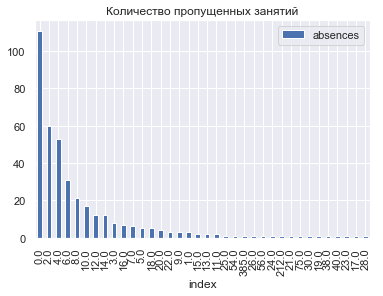

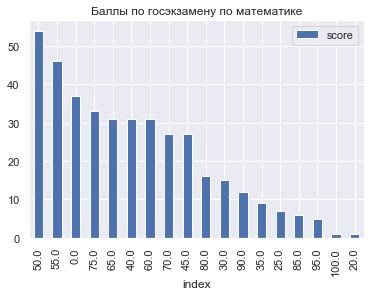

In [38]:
for column in students.columns:
    display_plot(column)


## Признаки имеют следующие типы:
* номинативные(бинарные) признаки: school, sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic;
* числовые: age, absences, score
* ранговые: Medu, Fedu, traveltime, studytime, reason, famrel, freetime, goout, health, Mjob, Fjob, guardian,failures

In [39]:
# group columns

all_columns = ['school', 'sex', 'age',
                'address', 'famsize', 'Pstatus',
                'Medu', 'Fedu', 'Mjob',
                'Fjob', 'reason', 'guardian',
                'traveltime', 'studytime', 'failures',
                'schoolsup', 'famsup', 'paid',
                'activities', 'nursery', 'granular',
                'higher', 'internet', 'romantic',
                'famrel', 'freetime', 'goout',
                'health', 'absences']


## Проверим дубликаты и пропущенные значения

In [40]:
# Check for duplicates
print("Duplicates: ",len(students[students.duplicated(keep=False) == True]))


Duplicates:  0


In [41]:
# Sum missed values
print("Have NULL values:\n",students.isnull().sum())

Have NULL values:
 school         0
sex            0
age            0
address       17
famsize       27
Pstatus       45
Medu           3
Fedu          24
Mjob          19
Fjob          36
reason        17
guardian      31
traveltime    28
studytime      7
failures      22
schoolsup      9
famsup        39
paid          40
activities    14
nursery       16
granular       7
higher        20
internet      34
romantic      31
famrel        27
freetime      11
goout          8
health        15
absences      12
score          6
dtype: int64


In [42]:
#Lost data relative to all data
lost = students.isnull().sum().sum()*100 / (len(students)*30)
print (f'{round(lost,2)}%' + ' lost data')

4.77% lost data


# Рекомендации по выполнению проекта
1. Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
3. Посмотрите на распределение признака для числовых переменных, устраните выбросы.
4. Оцените количество уникальных значений для номинативных переменных.
5. По необходимости преобразуйте данные
6. Проведите корреляционный анализ количественных переменных
7. Отберите не коррелирующие переменные.
8. Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

## Выводы:
* Выбросы в Fedu, famrel
* Убрать неиформативный признак granular
* Признак failures сгруппировать с двумя значениями: 1 для значения > 0, 0 в остальных
* Посмотреть на столбец score, корреляцию числовых признаков
* Убирать пропуски в след. колонках:
* * address      
* * famsize       
* * Pstatus       
* * Medu           
* * Fedu          
* * Mjob          
* * Fjob          
* * reason        
* * guardian      
* * traveltime    
* * studytime     
* * failures      
* * schoolsup     
* * famsup       
* * paid          
* * activities    
* * nursery       
* * granular       
* * higher        
* * internet     
* * romantic      
* * famrel        
* * freetime      
* * goout         
* * health        
* * absences

In [43]:
#Seems the mistake is in value 40, change it to 4
students.loc[students.Fedu == 40, 'Fedu'] = 4

# replace mistaken value
students.loc[students.famrel == -1, 'famrel'] = 1

# change feature called failures
students.loc[students.failures > 0, 'failures'] = 1

print(students.loc[:10,['studytime','granular']])
correlate_granular = students[['studytime','granular']].corr()
print(correlate_granular)
# it's clear that we should drop non-informative feature 'granular'

students = students.drop('granular',axis=1)


    studytime  granular
0         2.0      -6.0
1         2.0      -6.0
2         2.0      -6.0
3         3.0      -9.0
4         2.0      -6.0
5         2.0      -6.0
6         2.0      -6.0
7         2.0      -6.0
8         2.0      -6.0
9         2.0      -6.0
10        2.0      -6.0
           studytime  granular
studytime        1.0      -1.0
granular        -1.0       1.0


In [44]:
all_columns = [
                'school', 'sex', 'age',
                'address', 'famsize', 'Pstatus',
                'Medu', 'Fedu', 'Mjob',
                'Fjob', 'reason', 'guardian',
                'traveltime', 'studytime', 'failures',
                'schoolsup', 'famsup', 'paid',
                'activities', 'nursery',
                'higher', 'internet', 'romantic',
                'famrel', 'freetime', 'goout',
                'health', 'absences', 'score'
                ]

numeric_columns = ['age', 'absences', 'score']

range_columns = [
    'Medu', 'Fedu', 'traveltime', 
    'studytime', 'famrel', 'freetime',
    'goout', 'health','reason', 'Mjob',
    'Fjob', 'guardian','failures'
]

category_columns = ['school', 'sex', 'address', 
                    'famsize', 'Pstatus', 'schoolsup',
                    'famsup', 'paid', 'activities',
                    'nursery', 'higher', 'internet',
                    'romantic'
                ]

## Score - Финальная оценка по экзамену
### Распишем традиционную систему оценок для 100-бальной системы

* 80-100 Отлично/Зачтено "A+" или "A"
* 60-79 Хорошо/Зачтено "B" или "C"
* 40-59 Удовлетворительно/Зачтено "D" или "E"
* 0-39 Неудовлетворительно/ Не Зачтено "Fx" или "F"

### Исходя из данного рассмотрения можем предложить решение еще одной задачи - задачи классификации
### для этого предложим классы основываясь на переменной Score
### 5 - label для класса отличников учеников с оценкой 80-100 Отлично/Зачтено "A+" или "A"
### 4 - label для класса хорошистов учеников с оценкой Хорошо/Зачтено "B" или "C"
### 3 - label для класса средничков учеников с оценкой Удовлетворительно/Зачтено "D" или "E"
### 2 - label для класса неуспевающих учеников с Неудовлетворительно/ Не Зачтено "Fx" или "F"

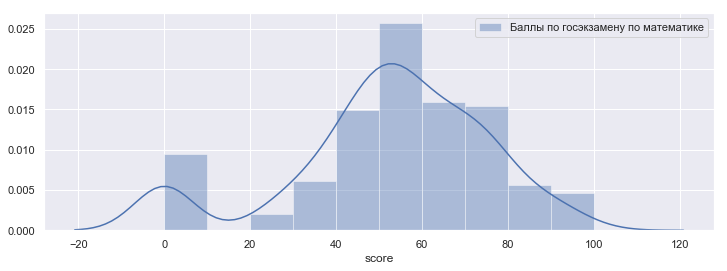

In [45]:
display_plot(column='score', data=students, plot_type='distplot')

In [46]:
students.score.value_counts(dropna=False)
students.score.shape

(395,)

### На практике отсутствие значений в колонке score, означает, что строки с пропусками в score нужно полностью удалить из dataset

In [47]:
students = students.dropna(subset=["score"],axis = 0)
target = students.score
target.shape

(389,)

## Рассмотрим корреляции только для числовых столбцов.

            age  absences  score
age       100.0      10.0  -16.0
absences   10.0     100.0    7.0
score     -16.0       7.0  100.0


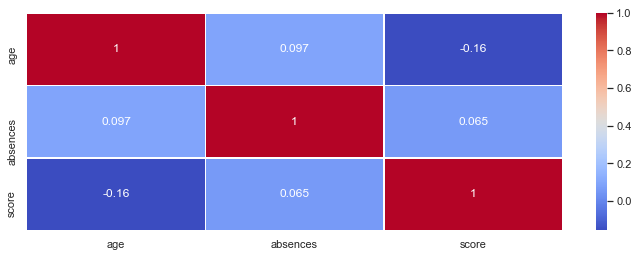

In [48]:
corr_table = round(students[numeric_columns].corr() * 100)
print(corr_table)
display_plot(numeric_columns, students, 'heatmap')



## Вывод:
* Зависимые признаки отсутствует
* Обратная корреляция между возрастом (age) и score 

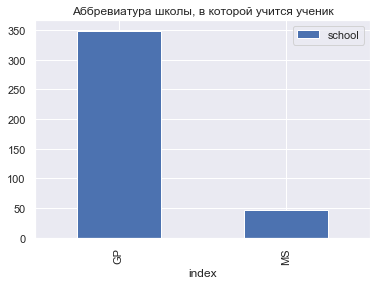

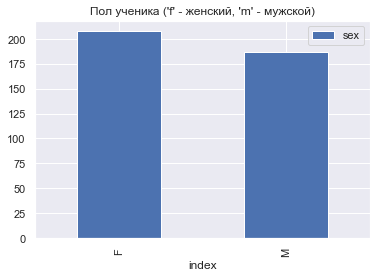

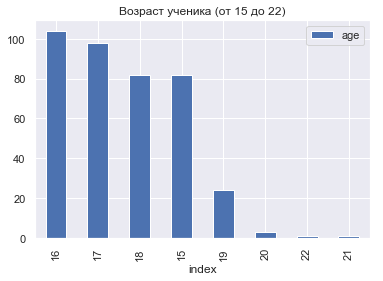

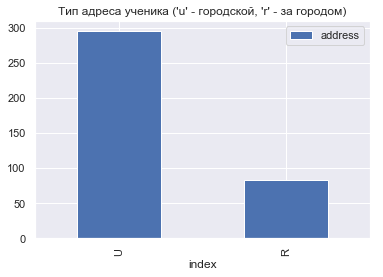

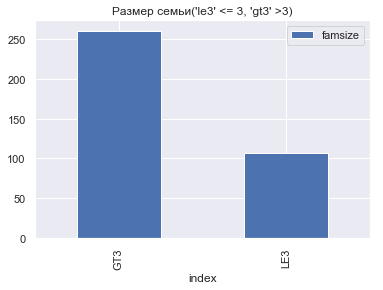

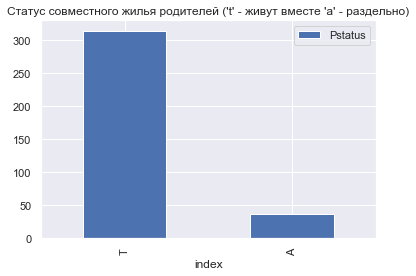

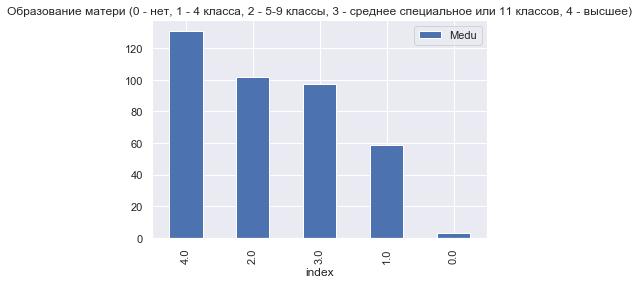

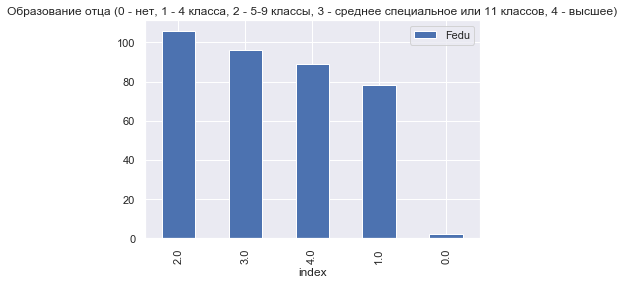

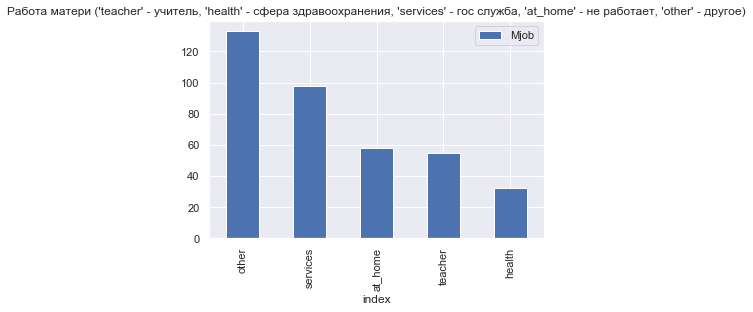

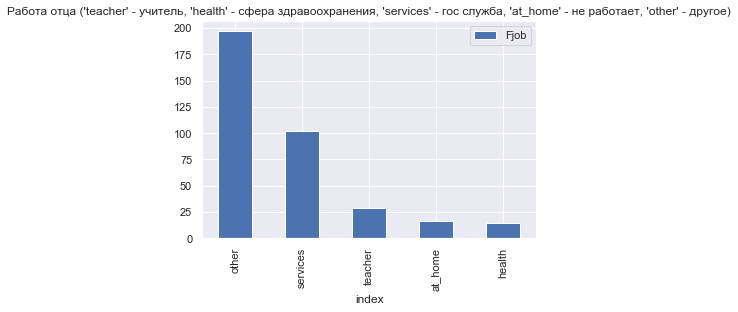

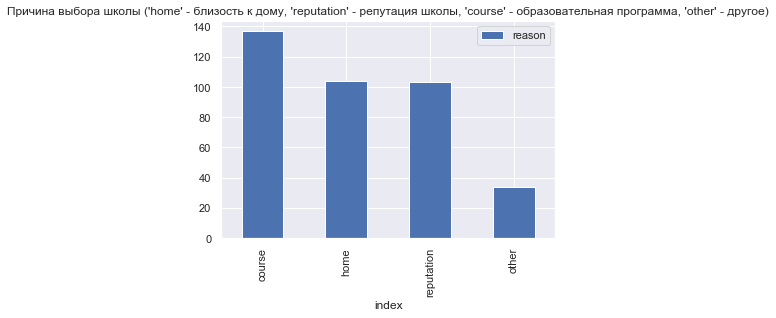

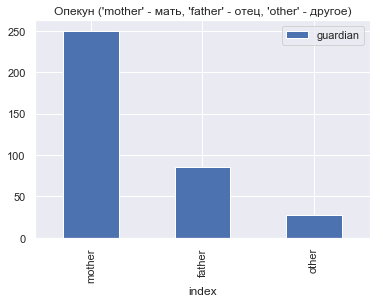

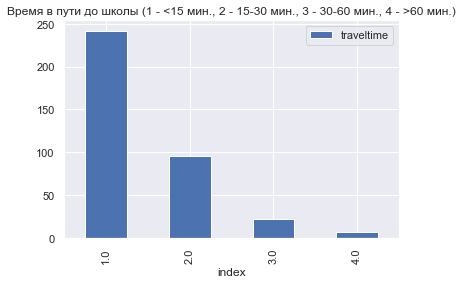

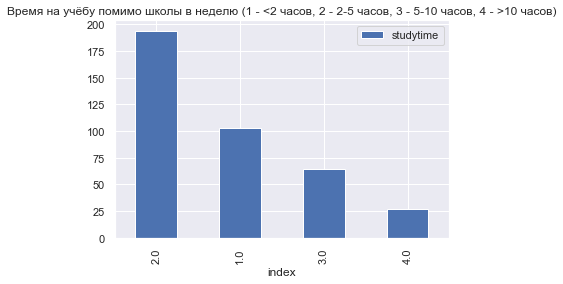

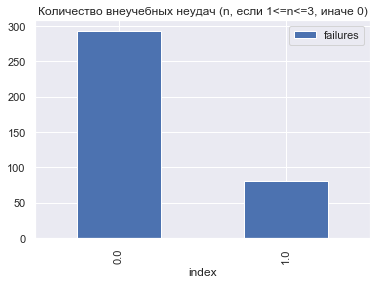

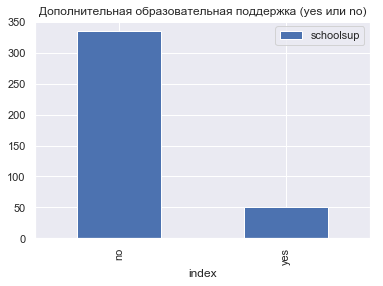

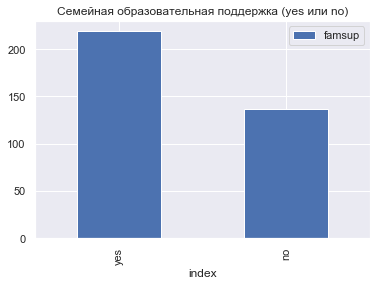

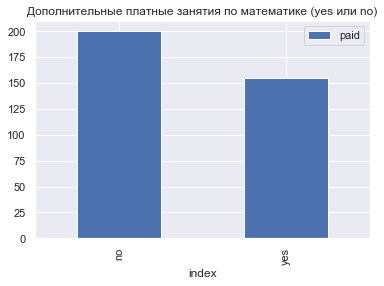

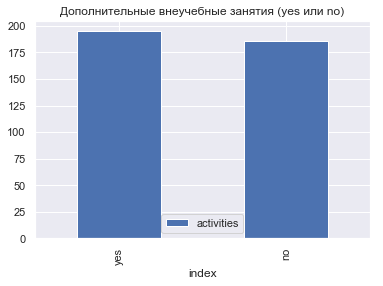

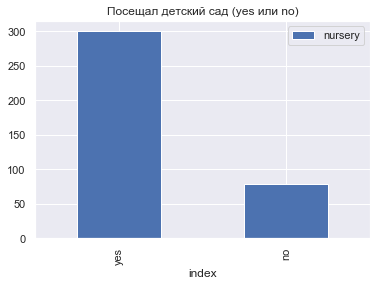

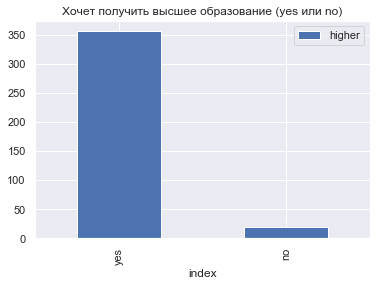

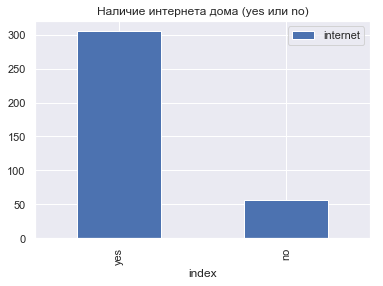

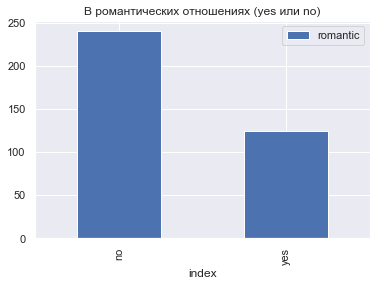

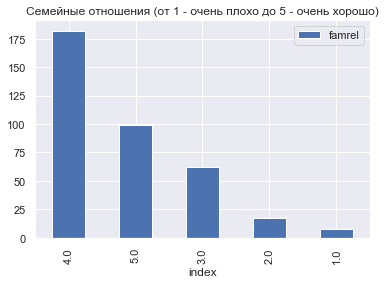

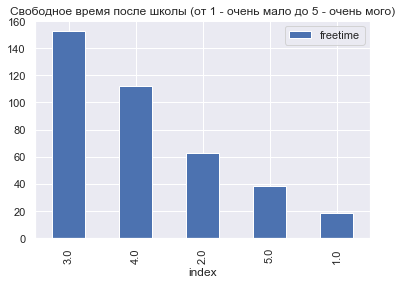

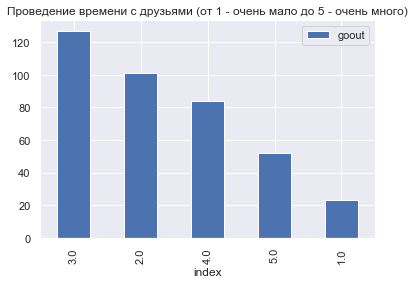

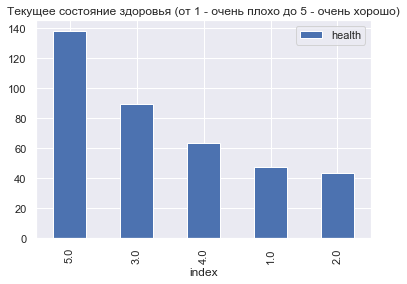

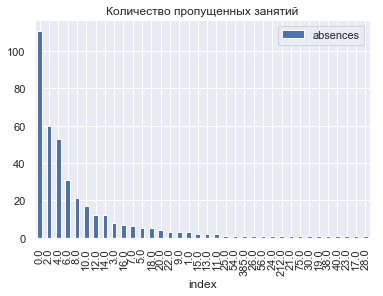

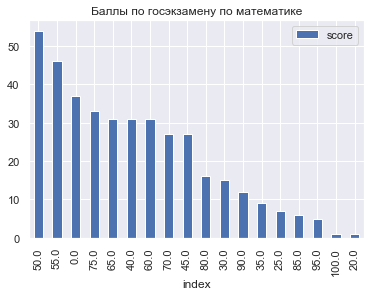

In [49]:
#Plot again to see the changes
for column in students.columns:
    display_plot(column)

In [50]:
# cut off outliers for values age, absences, score
for column in numeric_columns:
    q1,q3,IQR = iqr_test(column)
    # remove outliers:
    students = students[(students[column] >= q1 - 1.5*IQR) & (students[column] <= q3 + 1.5*IQR)]

Для колонки: age
25-% квартиль: 16.0
75-% квартиль: 18.0
IQR: 2.0
Границы разборса: (13.0,21.0)
Для колонки: absences
25-% квартиль: 0.0
75-% квартиль: 8.0
IQR: 8.0
Границы разборса: (-12.0,20.0)
Для колонки: score
25-% квартиль: 40.0
75-% квартиль: 70.0
IQR: 30.0
Границы разборса: (-5.0,115.0)


## Для случая absences границы разброса не соответствуют реальным значениям, то можем скорректировать границы 
### Границы absences разборса: (0,20.0)

## А для случая score границы разброса сильно выходят за рамки значиний признака

# convert category_columns to numeric
dict_nominative = {}

for column in category_columns:
    
    # filling the dictionary data by column
    dict_column = {}
    count = 0

    for value in students[column].unique(): 
        if type(value) != float:
            dict_column[value] = count
            count += 1

    dict_nominative[column] = dict_column

    students[column] = students[column].apply(lambda x: dict_column[x] if type(x) != float else None)



In [55]:
print(dict_nominative)
students.describe()

{'school': {'GP': 0, 'MS': 1}, 'sex': {'F': 0, 'M': 1}, 'address': {'U': 0, 'R': 1}, 'famsize': {'GT3': 0, 'LE3': 1}, 'Pstatus': {'A': 0, 'T': 1}, 'schoolsup': {'yes': 0, 'no': 1}, 'famsup': {'no': 0, 'yes': 1}, 'paid': {'no': 0, 'yes': 1}, 'activities': {'no': 0, 'yes': 1}, 'nursery': {'yes': 0, 'no': 1}, 'higher': {'yes': 0, 'no': 1}, 'internet': {'yes': 0, 'no': 1}, 'romantic': {'no': 0, 'yes': 1}}


age        Medu        Fedu  traveltime   studytime    failures  \
count  360.000000  357.000000  337.000000  332.000000  355.000000  341.000000   
mean    16.622222    2.756303    2.501484    1.442771    2.050704    0.196481   
std      1.229424    1.101325    1.091429    0.707988    0.858798    0.397920   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     21.000000    4.000000    4.000000    4.000000    4.000000    1.000000   

           famrel    freetime       goout      health    absences       score  
count  334.000000  353.000000  353.000000  345.000000  360.000000  360.000000  
mean     3.946108    3.243626    3.076487    3.562319    4.577778   52.027778  
std      0.915384    0.981430    1.106457    1.386092    4.959957   22.979325  
min      1.000000    1.000000    1.000000    1.000000    0.000000    0.000000  
25%      4.000000    3.000000    2.000000    3.000000    0.000000   40.000000  
50%      4.000000    3.000000    3.000000    4.000000    3.500000   55.000000  
75%      5.000000    4.000000    4.000000    5.000000    7.000000   70.000000  
max      5.000000    5.000000    5.000000    5.000000   20.000000  100.000000

In [58]:
columns_with_missed_data = list(dict_nominative.keys())
columns_with_missed_data

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [58]:
# replacement of missing data with mod -value

for column in category_columns:
   students[column] = students[column].fillna(students[column].value_counts().index[0])

for column in range_columns:
   students[column] = students[column].fillna(students[column].value_counts().index[0])

In [59]:
# for range values convert to One HOT Encoding
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
for column in category_columns:
    values = students[column]
    print(values)

    #integers encode
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    print(integer_encoded)
    
    #binary encode
    onehot_encoder = OneHotEncoder(sparse=False,dtype=np.int)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    print(onehot_encoded)
    
    # invert first example
    inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
    print(inverted)

1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]
['no']
0       no
1       no
2       no
3      yes
4       no
5      yes
6       no
7       no
8       no
9      yes
10      no
11     yes
12     yes
13      no
14      no
15      no
16     yes
17     yes
18     yes
19     yes
20      no
21      no
22     yes
23     yes
25      no
      ... 
369     no
370    yes
371    ye

In [60]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 29 columns):
school        360 non-null object
sex           360 non-null object
age           360 non-null int64
address       360 non-null object
famsize       360 non-null object
Pstatus       360 non-null object
Medu          360 non-null float64
Fedu          360 non-null float64
Mjob          360 non-null object
Fjob          360 non-null object
reason        360 non-null object
guardian      360 non-null object
traveltime    360 non-null float64
studytime     360 non-null float64
failures      360 non-null float64
schoolsup     360 non-null object
famsup        360 non-null object
paid          360 non-null object
activities    360 non-null object
nursery       360 non-null object
higher        360 non-null object
internet      360 non-null object
romantic      360 non-null object
famrel        360 non-null float64
freetime      360 non-null float64
goout         360 non-null float64
heal

## Вывод
* Заполненны пропуски в таблице.
* Исправлены данные.
* Таблица очищина от выбросов.

school


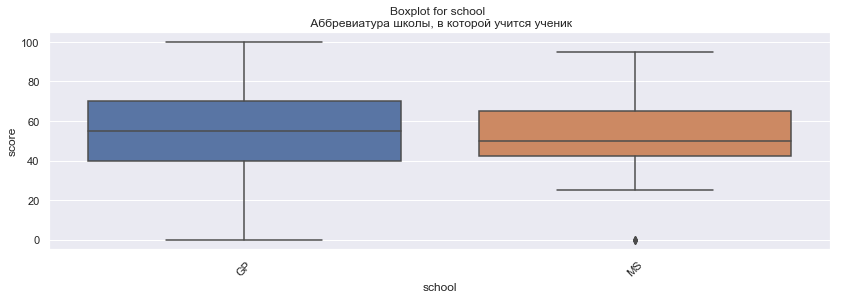

sex


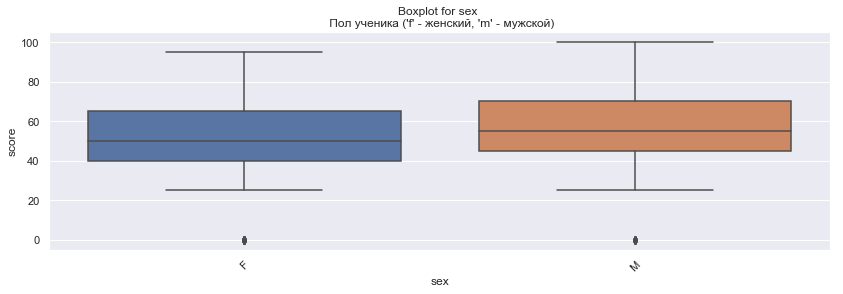

address


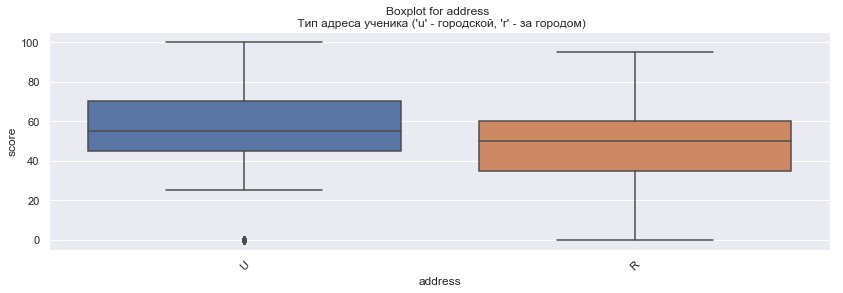

famsize


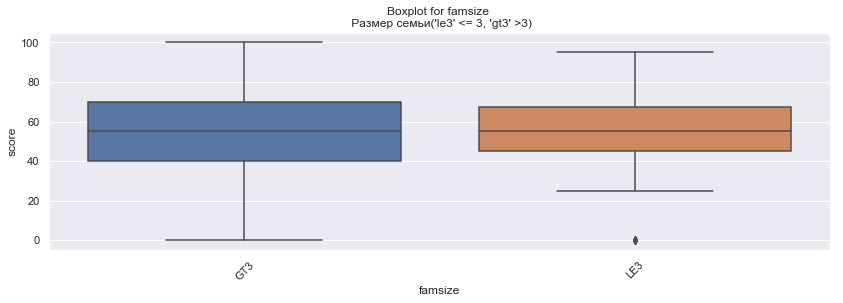

Pstatus


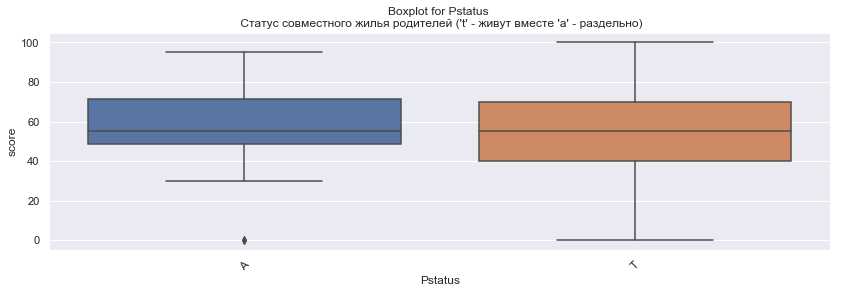

schoolsup


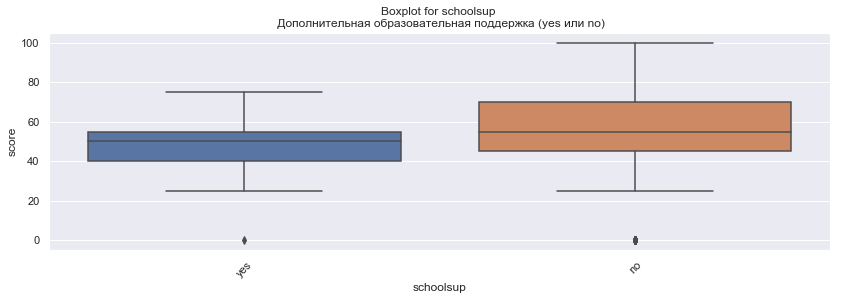

famsup


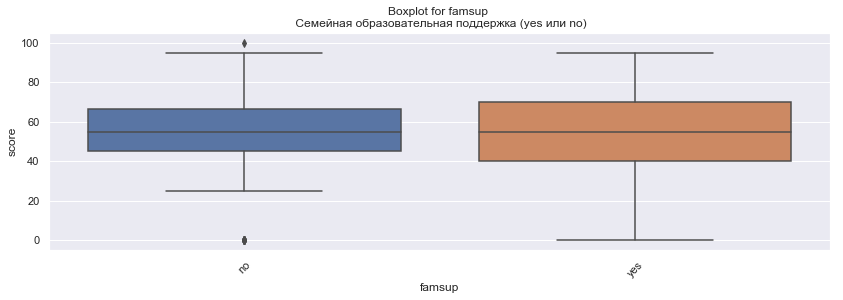

paid


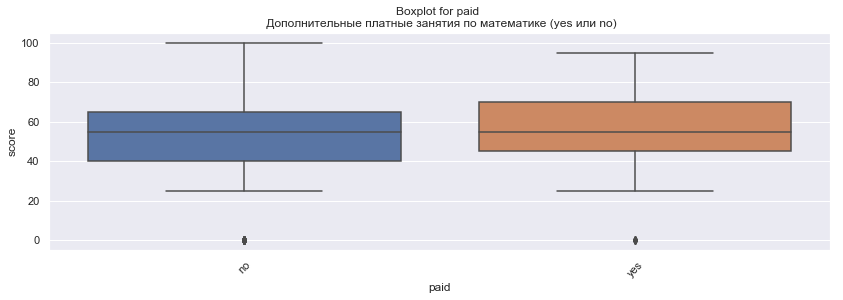

activities


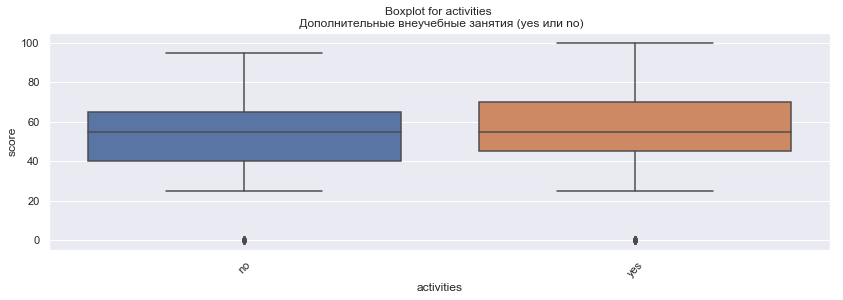

nursery


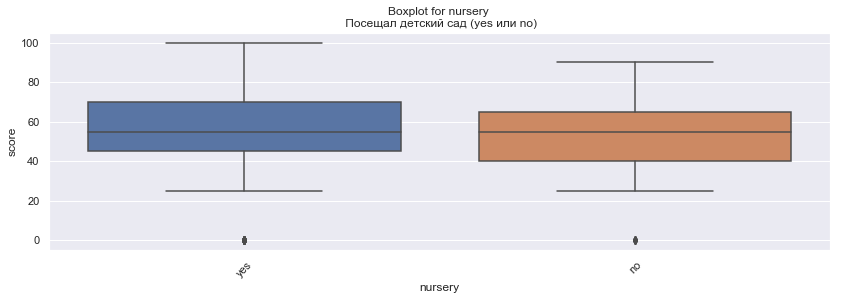

higher


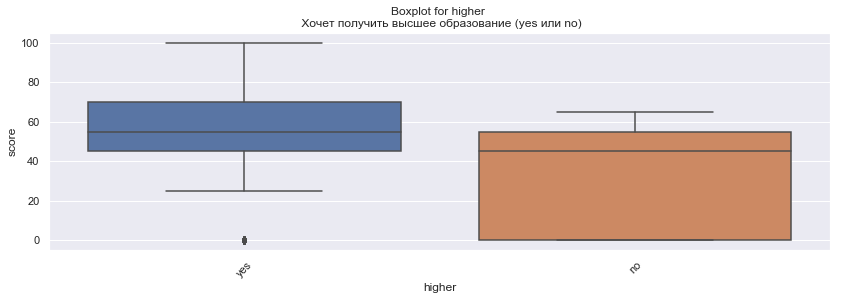

internet


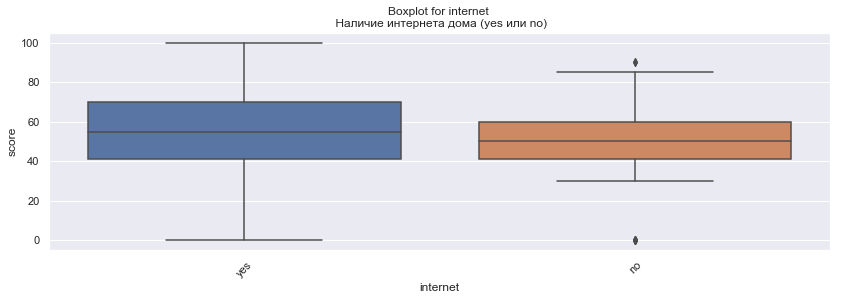

romantic


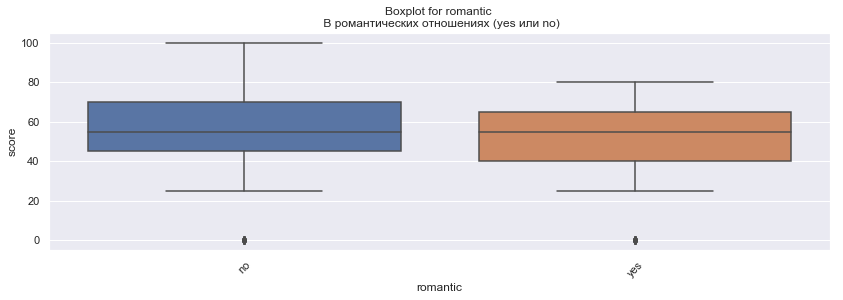

Medu


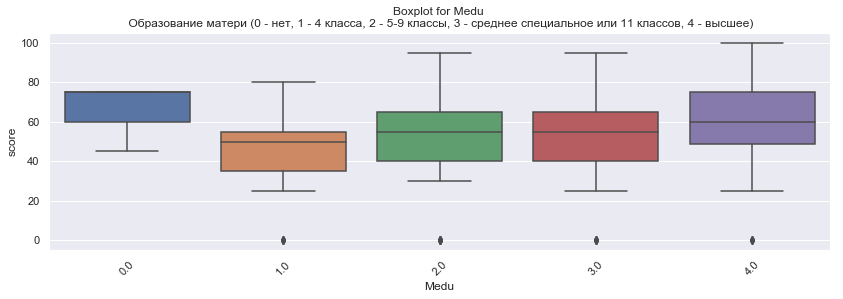

Fedu


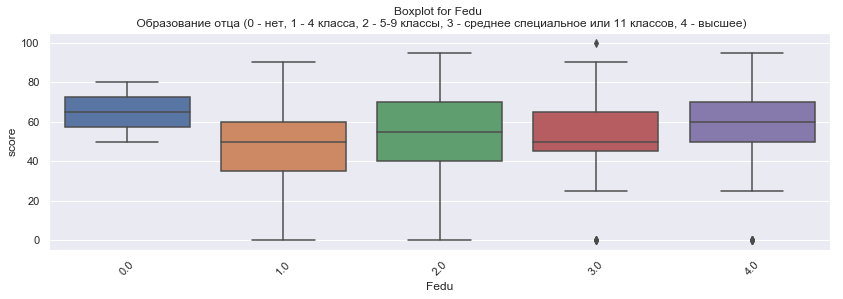

traveltime


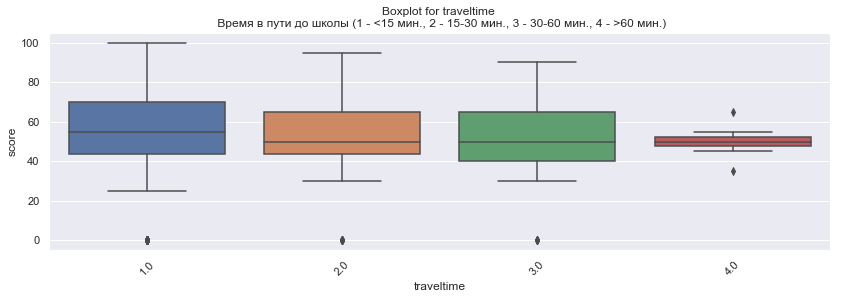

studytime


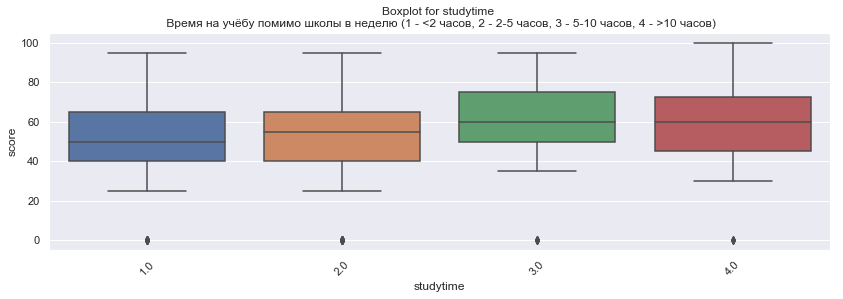

famrel


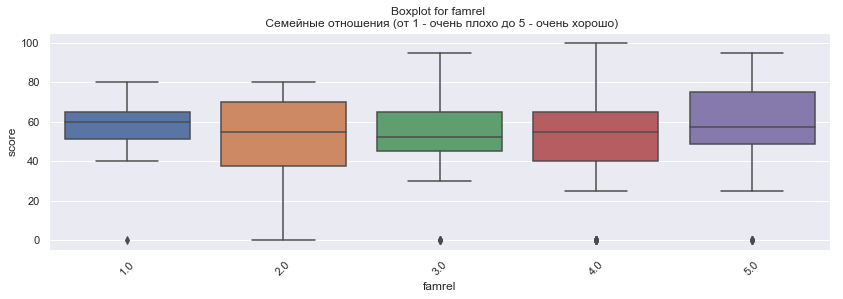

freetime


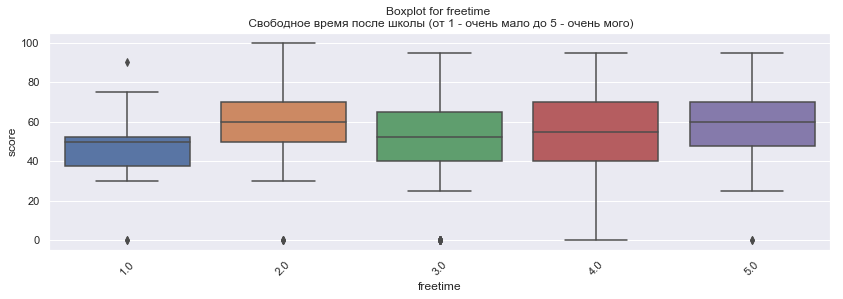

goout


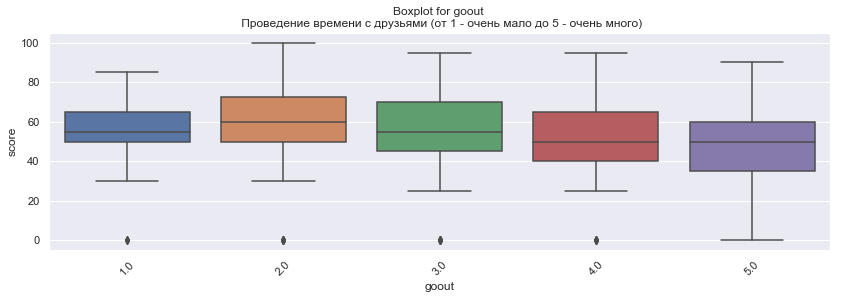

health


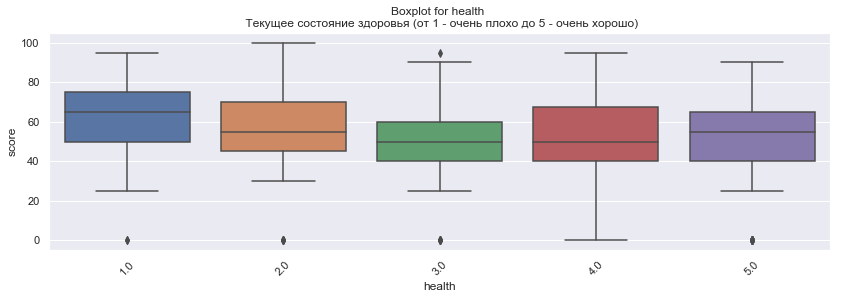

reason


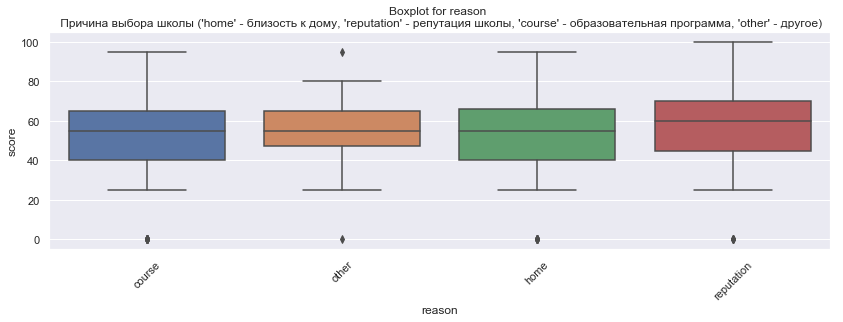

Mjob


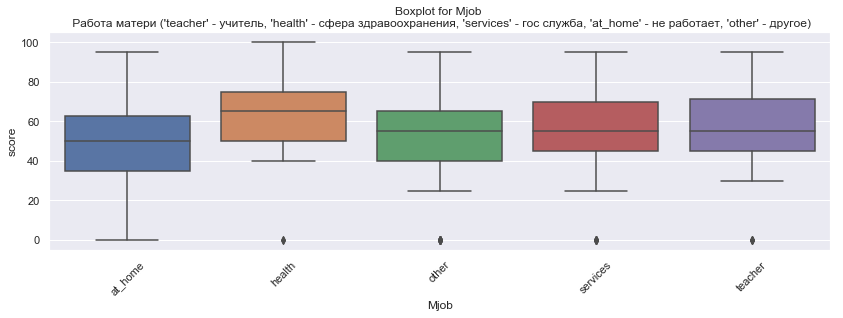

Fjob


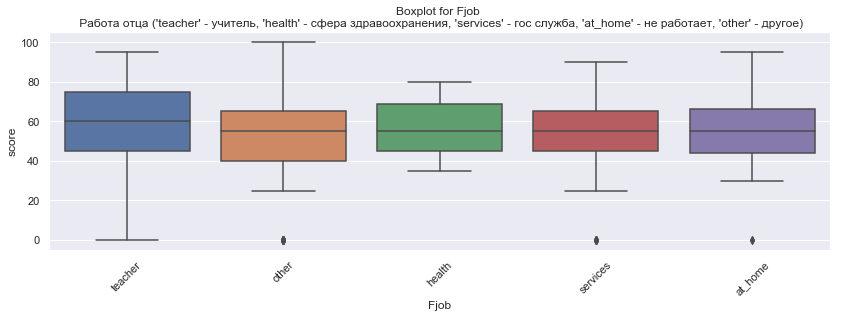

guardian


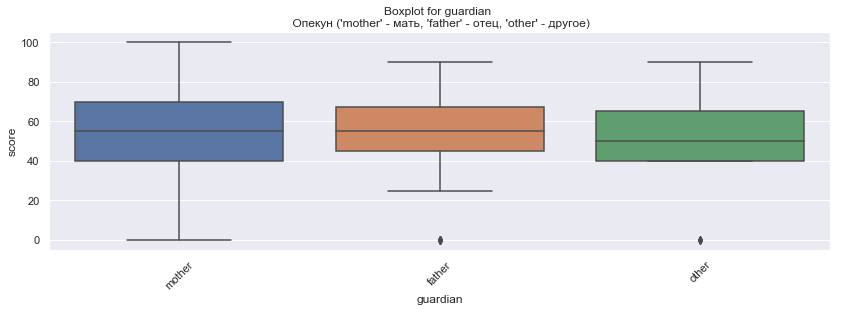

failures


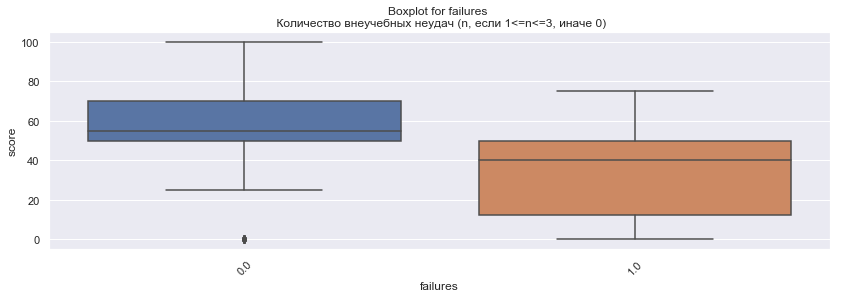

In [61]:
# make boxplot and rate them
for column in category_columns:
    print(column)
    display_plot(column, students, 'boxplot')
for column in range_columns:
    print(column)
    display_plot(column, students, 'boxplot')

* 'school': {'GP': 0, 'MS': 1},
* 'sex': {'F': 0, 'M': 1},
* 'address': {'U': 0, 'R': 1},
* 'famsize': {'GT3': 0, 'LE3': 1},
* 'Pstatus': {'A': 0, 'T': 1},
* 'Mjob': {'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4},
* 'Fjob': {'teacher': 0, 'other': 1, 'health': 2, 'services': 3, 'at_home': 4},
* 'reason': {'course': 0, 'other': 1, 'home': 2, 'reputation': 3},
* 'guardian': {'mother': 0, 'father': 1, 'other': 2},
* 'schoolsup': {'yes': 0, 'no': 1},
* 'famsup': {'no': 0, 'yes': 1},
* 'paid': {'no': 0, 'yes': 1},
* 'activities': {'no': 0, 'yes': 1},
* 'nursery': {'yes': 0, 'no': 1},
* 'higher': {'yes': 0, 'no': 1},
* 'internet': {'yes': 0, 'no': 1},
* 'romantic': {'no': 0, 'yes': 1}}

### Вывод:
* Медианная оценка по математике учащихся школы GP, чем в школе MS;
* В целом мужчины получают более высокие оценки, чем женщины;
* В целом ребята из города сдают лучше, чем ребята, живущие за городом. При этом стоит отметить более высокий разброс в оценке среди ребят, живущих в городе;
* В целом ребята из семей с разным количеством членов сдают госсэкзамен по математике приблезительно одинаково. Для тех ребят у которых семьи больше 3 человек меньше разброс, но это связано с количеством выборки;
* При оценки совместного проживания родителей средняя оценка медианная оценка получилась примерно одинаковой;
* Матери с высшем образованием, стимулируют своих детей лучше сдавать государственный экзамен по математике;
* Образование отцов также влияет на качество оценки по государственному экзамену;
* Матери работающие в сфере здравоохранения лучше стимулируют своих детей к качеству сдачи экзамена по математике;
* Сфера работы отцов не оказывает существенного влияния на оценку по экзамену по математике;
* Репутация школы влияет на оценку по госэкзамену по математике;
* Для более качественной оценки по экзамену, лучше чтобы опекуном был кто-то из родителей;
* Время в пути от дома до школы не влияет на оценку;
* Дети, которые занимаются дополнительно внешколы, лучше здают экзамен;
* Дети, у которых нет внеучебных неудач, лучше сдают экзамен;
* Дети, с дополнительной образовательной поддержкой в школе, сдают экзамен хуже;
* Дополнительна образовательная поддержка родитлей, сильно не влияет на оценки по экзамену;
* Дополнительные платные занятия в улучшают оценку, но среднюю оставляют приблезительно одинаковую;
* Дополнительные занятия повышает верхнюю границу оценок, но оставляет медианное значение одиноковым;
* Посещение детского сада увеличивает верхние границы оценок, но среднее значение оценок остается одинаковым с теми детьми, которые не посещали;
* Дети, которые приняли решение о поступлении, имеют более высокий верхний предел оценок по математике, от детей которые не планируют поступать;
* Интернет помогает получать более высокие оценки;
* Роматические чувства мешают обучению математике;
* Дети с очень плохими и очень хорошими отношениями учаться лучше чем условно "нейтральные";
* Дети у которых есть сводбодное время, лучше чем которые его нет;
* Без друзей плохо, но и много времени проведенного с друзьями тоже плохо, в данном вопросе лучше умеренное общение;
* Дети с проблемами со здоровьем в целом учаться лучше.

In [62]:
# Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента c разными уровнями значимости alpha
cols = [        'school', 'sex', 'age',
                'address', 'famsize', 'Pstatus',
                'Medu', 'Fedu', 'Mjob',
                'Fjob', 'reason', 'guardian',
                'traveltime', 'studytime', 'failures',
                'schoolsup', 'famsup', 'paid',
                'activities', 'nursery', 
                'higher', 'internet', 'romantic',
                'famrel', 'freetime', 'goout',
                'health']
alpha = 0.01
print(f'Уровень значимости alpha равен: {alpha}')
for col in cols:
    get_stat_dif( col, students, 'score', alpha)

alpha = 0.05
print(f'Уровень значимости alpha равен: {alpha}')
for col in cols:
    get_stat_dif(col, students, 'score', alpha)

alpha = 0.1
print(f'Уровень значимости alpha равен: {alpha}')
for col in cols:
    get_stat_dif(col, students, 'score', alpha)

Уровень значимости alpha равен: 0.01
Найдены статистически значимые различия для колонки: address
Найдены статистически значимые различия для колонки: Medu
Найдены статистически значимые различия для колонки: failures
Найдены статистически значимые различия для колонки: higher
Уровень значимости alpha равен: 0.05
Найдены статистически значимые различия для колонки: sex
Найдены статистически значимые различия для колонки: address
Найдены статистически значимые различия для колонки: Medu
Найдены статистически значимые различия для колонки: Medu
Найдены статистически значимые различия для колонки: Mjob
Найдены статистически значимые различия для колонки: failures
Найдены статистически значимые различия для колонки: paid
Найдены статистически значимые различия для колонки: higher
Найдены статистически значимые различия для колонки: romantic
Уровень значимости alpha равен: 0.1
Найдены статистически значимые различия для колонки: sex
Найдены статистически значимые различия для колонки: age
Н

# Вывод:

При проверке статзначимсти выявлены следующие столбцы: sex, address, Medu, Mjob, failures, paid, higher, romantic.
Оставляем следующие столбцы для построения модели.

In [63]:
features = students.loc[:, ['school', 'sex', 'address', 'Medu', 'Mjob', 'failures', 'schoolsup', 'famsup', 'paid', 'higher', 'romantic']]

In [64]:
features.head(10)
features.shape
target.shape

(389,)

In [65]:
#Split arrays or matrices into random train and test subsets
train_X,train_y,test_X, test_y =train_test_split(features,target,test_size=0.33,shuffle = True, random_state=45)

# train the logistic regression model

model = LinearRegression()


ValueError: Found input variables with inconsistent numbers of samples: [360, 389]

In [69]:
model.fit(train_X, train_y)

ValueError: could not convert string to float: 'other'

In [ ]:
pd.DataFrame(features.columns, model.coef_)